In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

%matplotlib inline

In [3]:
DATASET_PATH = "datasets/"
datasets = [f for f in listdir(DATASET_PATH) if isfile(join(DATASET_PATH, f)) and f != '.DS_Store']
datasets

['agaricus-lepiota.data.txt',
 'primary-tumor.data.txt',
 'hayes-roth.data.txt',
 'monks-2.test.txt',
 'nursery.data.txt',
 'lymphography.data.txt',
 'soybean-large.data.txt',
 'car.data.txt',
 'SPECT.test.txt',
 'adult+stretch.data.txt',
 'balance-scale.data.txt']

In [4]:
def get_info_for_data(dataset_name, data_dict_list, n_splits=10):
    data_dict = {}
    
    data = pd.read_csv(DATASET_PATH + dataset_name, header = None)
    data = data.replace('?', np.NaN)
    data = data.dropna(axis=1)
    data = data.apply(lambda x: pd.factorize(x)[0])

    data_dict = {"name": dataset_name, "num_instances": data.shape[0], "num_attributes": data.shape[1], "num_classes": sum(data.nunique())}
    
    print()
    print(len(data_dict_list))
    print(dataset_name)
    print(data.shape)
    print()
    # print(data.head())
    # print()

    # number of attributes, Random average height, and Random average accuracy
    
    y_col = 0
    X = data.drop(y_col, 1)
    y = data[y_col]
    skf = StratifiedKFold(n_splits=n_splits)
    accuracies = []
    tree_depths = []
    accuracies2 = []
    tree_depths2 = []
    data_split = skf.split(X, y)
    # try:
    for train, test in data_split:

        # C4.5 Tree:
        model = DecisionTreeClassifier(criterion='entropy')
        model.fit(X.loc[train] , y.loc[train])
        y_predict = model.predict(X.loc[test])
        accuracy = accuracy_score(y.loc[test], y_predict)
        accuracies.append(accuracy)
        tree_depth = dectree_max_depth(model.tree_)
        tree_depths.append(tree_depth)

        # Random Tree:
        model2 = ExtraTreeClassifier(criterion='entropy', max_features=1)
        model2.fit(X.loc[train] , y.loc[train])
        y_predict = model2.predict(X.loc[test])
        accuracy = accuracy_score(y.loc[test], y_predict)
        accuracies2.append(accuracy)
        tree_depth = dectree_max_depth(model2.tree_)
        tree_depths2.append(tree_depth)
    data_dict["C4.5 Avg Accuracy"] = sum(accuracies) / len(accuracies)
    data_dict["C4.5 Avg Height"] = sum(tree_depths) / len(tree_depths)
    data_dict["Random Avg Accuracy"] = sum(accuracies2) / len(accuracies2)
    data_dict["Random Avg Height"] = sum(tree_depths2) / len(tree_depths2)
    data_dict_list.append(data_dict)
    print(data_dict)
    print()
    # except:
    #    print("Exception!")
    

In [5]:
def dectree_max_depth(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)
# Use: t.tree_
# From: https://stackoverflow.com/questions/26602369/how-to-find-out-the-size-of-a-sklearn-decision-tree-in-python

In [6]:
# Use a table to present your experiment results. The table should include the following
# dataset name, number of instances, number of attributes, number of classes, avg height, avg acc, rand hei, rand acc

data_dict_list = []
for dataset in datasets: # datasets[7:-1]:
    get_info_for_data(dataset, data_dict_list, 10)


0
agaricus-lepiota.data.txt
(8124, 22)

{'name': 'agaricus-lepiota.data.txt', 'num_instances': 8124, 'num_attributes': 22, 'num_classes': 114, 'C4.5 Avg Accuracy': 0.9685116851168513, 'C4.5 Avg Height': 7.7, 'Random Avg Accuracy': 0.9611152313742618, 'Random Avg Height': 19.0}


1
primary-tumor.data.txt
(339, 13)



/Users/jm/anaconda3/envs/dm/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'name': 'primary-tumor.data.txt', 'num_instances': 339, 'num_attributes': 13, 'num_classes': 46, 'C4.5 Avg Accuracy': 0.3117351924041314, 'C4.5 Avg Height': 12.2, 'Random Avg Accuracy': 0.30718617458854725, 'Random Avg Height': 13.5}


2
hayes-roth.data.txt
(133, 5)

{'name': 'hayes-roth.data.txt', 'num_instances': 133, 'num_attributes': 5, 'num_classes': 19, 'C4.5 Avg Accuracy': 0.1930769230769231, 'C4.5 Avg Height': 10.5, 'Random Avg Accuracy': 0.18205128205128204, 'Random Avg Height': 9.8}


3
monks-2.test.txt
(433, 7)

{'name': 'monks-2.test.txt', 'num_instances': 433, 'num_attributes': 7, 'num_classes': 23, 'C4.5 Avg Accuracy': 0.41506342494714576, 'C4.5 Avg Height': 10.3, 'Random Avg Accuracy': 0.3207188160676533, 'Random Avg Height': 12.4}


4
nursery.data.txt
(12960, 9)

{'name': 'nursery.data.txt', 'num_instances': 12960, 'num_attributes': 9, 'num_classes': 32, 'C4.5 Avg Accuracy': 0.4398148148148147, 'C4.5 Avg Height': 18.6, 'Random Avg Accuracy': 0.3911265432098766, 'Random

/Users/jm/anaconda3/envs/dm/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/jm/anaconda3/envs/dm/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'name': 'soybean-large.data.txt', 'num_instances': 307, 'num_attributes': 2, 'num_classes': 21, 'C4.5 Avg Accuracy': 0.1632500969090235, 'C4.5 Avg Height': 2.0, 'Random Avg Accuracy': 0.1632500969090235, 'Random Avg Height': 2.0}


7
car.data.txt
(1728, 7)

{'name': 'car.data.txt', 'num_instances': 1728, 'num_attributes': 7, 'num_classes': 25, 'C4.5 Avg Accuracy': 0.3560517970401692, 'C4.5 Avg Height': 14.0, 'Random Avg Accuracy': 0.31917283298097254, 'Random Avg Height': 14.5}


8
SPECT.test.txt
(187, 23)

{'name': 'SPECT.test.txt', 'num_instances': 187, 'num_attributes': 23, 'num_classes': 46, 'C4.5 Avg Accuracy': 0.8761695906432747, 'C4.5 Avg Height': 11.6, 'Random Avg Accuracy': 0.8878362573099416, 'Random Avg Height': 14.9}


9
adult+stretch.data.txt
(20, 5)

{'name': 'adult+stretch.data.txt', 'num_instances': 20, 'num_attributes': 5, 'num_classes': 10, 'C4.5 Avg Accuracy': 0.5, 'C4.5 Avg Height': 4.2, 'Random Avg Accuracy': 0.5, 'Random Avg Height': 4.8}


10
balance-scale.data.

In [7]:
# Use a table to present your experiment results. The table should include the following
df = pd.DataFrame(data_dict_list)
df = df[['name', 'num_instances', 'num_attributes', 'num_classes', 'C4.5 Avg Accuracy', 'C4.5 Avg Height', 'Random Avg Accuracy', 'Random Avg Height']]
df.corr()

,num_instances,num_attributes,num_classes,C4.5 Avg Accuracy,C4.5 Avg Height,Random Avg Accuracy,Random Avg Height
num_instances,1.000000,0.190845,0.393868,0.206282,0.484793,0.211138,0.609317
num_attributes,0.190845,1.000000,0.821264,0.812544,0.127505,0.810171,0.605260
num_classes,0.393868,0.821264,1.000000,0.708877,-0.025014,0.707456,0.586990
C4.5 Avg Accuracy,0.206282,0.812544,0.708877,1.000000,0.048677,0.984489,0.570920
C4.5 Avg Height,0.484793,0.127505,-0.025014,0.048677,1.000000,0.012857,0.770623
Random Avg Accuracy,0.211138,0.810171,0.707456,0.984489,0.012857,1.000000,0.532796
Random Avg Height,0.609317,0.605260,0.586990,0.570920,0.770623,0.532796,1.000000


### Sources

http://www.cs.uvm.edu/~icdm/algorithms/10Algorithms-08.pdf

"CART uses the Gini diversity index to rank tests, whereas C4.5 uses information-based
criteria"

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

"CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. "
scikit-learn uses an optimised version of the CART algorithm

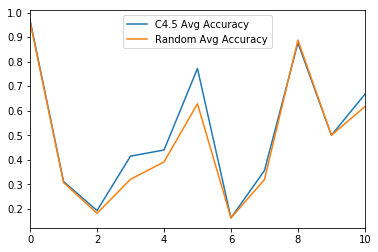

In [8]:
df[['C4.5 Avg Accuracy', 'Random Avg Accuracy']].plot()

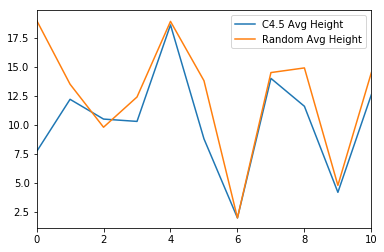

In [9]:
df[['C4.5 Avg Height', 'Random Avg Height']].plot()